In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline

In [19]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from sklearn import preprocessing
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers.recurrent import LSTM

In [20]:
print(sm.datasets.sunspots.NOTE)
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [21]:
series = dta['SUNACTIVITY'].tolist()
size = int(len(series) * 0.66)
train, test = series[0:size], series[size:len(series)]

In [22]:
window_size = 8
def make_model(window_size):
    model = Sequential()
    model.add(Dense(8, input_dim=window_size, init="uniform",
    activation="tanh"))
    model.add(Dense(4, init="uniform", activation="tanh"))
    model.add(Dense(1))
    model.add(Activation("linear"))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


model = make_model(8)
min_max_scaler = preprocessing.MinMaxScaler()
train = np.array(train).reshape(-1,1)

train_scaled = min_max_scaler.fit_transform(train) 

train_X,train_Y = [],[]
for i in range(0 , len(train_scaled) - window_size):
    train_X.append(train_scaled[i:i+window_size])
    train_Y.append(train_scaled[i+window_size])

new_train_X,new_train_Y = [],[]
for i in train_X:
    new_train_X.append(i.reshape(-1))
for i in train_Y:
    new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, kernel_initializer="uniform", input_dim=8, activation="tanh")`
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, kernel_initializer="uniform", activation="tanh")`
  


In [23]:
model.fit(new_train_X,new_train_Y, nb_epoch=2000, batch_size=512, validation_split = .05)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 185 samples, validate on 10 samples
Epoch 1/2000
185/185 [==============================] - 0s 2ms/step - loss: 0.1355 - val_loss: 0.0851
Epoch 2/2000
185/185 [==============================] - 0s 25us/step - loss: 0.1336 - val_loss: 0.0835
Epoch 3/2000
185/185 [==============================] - 0s 28us/step - loss: 0.1314 - val_loss: 0.0818
Epoch 4/2000
185/185 [==============================] - 0s 31us/step - loss: 0.1292 - val_loss: 0.0801
Epoch 5/2000
185/185 [==============================] - 0s 27us/step - loss: 0.1269 - val_loss: 0.0784
Epoch 6/2000
185/185 [==============================] - 0s 31us/step - loss: 0.1246 - val_loss: 0.0767
Epoch 7/2000
185/185 [==============================] - 0s 24us/step - loss: 0.1223 - val_loss: 0.0750
Epoch 8/2000
185/185 [==============================] - 0s 24us/step - loss: 0.1200 - val_loss: 0.0733
Epoch 9/2000
185/185 [==============================] - 0s 22us/step - loss: 0.1176 - val_loss: 0.0716
Epoch 10/2000
185/185 [======

Epoch 80/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0423 - val_loss: 0.0321
Epoch 81/2000
185/185 [==============================] - 0s 22us/step - loss: 0.0420 - val_loss: 0.0318
Epoch 82/2000
185/185 [==============================] - 0s 22us/step - loss: 0.0417 - val_loss: 0.0314
Epoch 83/2000
185/185 [==============================] - 0s 20us/step - loss: 0.0413 - val_loss: 0.0311
Epoch 84/2000
185/185 [==============================] - 0s 21us/step - loss: 0.0410 - val_loss: 0.0308
Epoch 85/2000
185/185 [==============================] - 0s 22us/step - loss: 0.0406 - val_loss: 0.0305
Epoch 86/2000
185/185 [==============================] - 0s 22us/step - loss: 0.0403 - val_loss: 0.0302
Epoch 87/2000
185/185 [==============================] - 0s 22us/step - loss: 0.0399 - val_loss: 0.0299
Epoch 88/2000
185/185 [==============================] - 0s 21us/step - loss: 0.0396 - val_loss: 0.0296
Epoch 89/2000
185/185 [==============================] - 0s 21us

Epoch 159/2000
185/185 [==============================] - 0s 25us/step - loss: 0.0187 - val_loss: 0.0125
Epoch 160/2000
185/185 [==============================] - 0s 19us/step - loss: 0.0186 - val_loss: 0.0125
Epoch 161/2000
185/185 [==============================] - 0s 22us/step - loss: 0.0186 - val_loss: 0.0125
Epoch 162/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0185 - val_loss: 0.0125
Epoch 163/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0184 - val_loss: 0.0125
Epoch 164/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0183 - val_loss: 0.0125
Epoch 165/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0182 - val_loss: 0.0124
Epoch 166/2000
185/185 [==============================] - 0s 22us/step - loss: 0.0181 - val_loss: 0.0124
Epoch 167/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0180 - val_loss: 0.0124
Epoch 168/2000
185/185 [==============================]

185/185 [==============================] - 0s 21us/step - loss: 0.0143 - val_loss: 0.0099
Epoch 238/2000
185/185 [==============================] - 0s 22us/step - loss: 0.0142 - val_loss: 0.0098
Epoch 239/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0142 - val_loss: 0.0098
Epoch 240/2000
185/185 [==============================] - 0s 22us/step - loss: 0.0142 - val_loss: 0.0098
Epoch 241/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0141 - val_loss: 0.0097
Epoch 242/2000
185/185 [==============================] - 0s 22us/step - loss: 0.0141 - val_loss: 0.0097
Epoch 243/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0140 - val_loss: 0.0097
Epoch 244/2000
185/185 [==============================] - 0s 25us/step - loss: 0.0140 - val_loss: 0.0096
Epoch 245/2000
185/185 [==============================] - 0s 25us/step - loss: 0.0140 - val_loss: 0.0096
Epoch 246/2000
185/185 [==============================] - 0s 25us/step

Epoch 316/2000
185/185 [==============================] - 0s 26us/step - loss: 0.0117 - val_loss: 0.0072
Epoch 317/2000
185/185 [==============================] - 0s 25us/step - loss: 0.0116 - val_loss: 0.0072
Epoch 318/2000
185/185 [==============================] - 0s 25us/step - loss: 0.0116 - val_loss: 0.0071
Epoch 319/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0116 - val_loss: 0.0071
Epoch 320/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0116 - val_loss: 0.0071
Epoch 321/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0115 - val_loss: 0.0071
Epoch 322/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0115 - val_loss: 0.0070
Epoch 323/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0115 - val_loss: 0.0070
Epoch 324/2000
185/185 [==============================] - 0s 21us/step - loss: 0.0114 - val_loss: 0.0070
Epoch 325/2000
185/185 [==============================]

185/185 [==============================] - 0s 25us/step - loss: 0.0101 - val_loss: 0.0056
Epoch 395/2000
185/185 [==============================] - 0s 26us/step - loss: 0.0101 - val_loss: 0.0056
Epoch 396/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0101 - val_loss: 0.0056
Epoch 397/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0100 - val_loss: 0.0056
Epoch 398/2000
185/185 [==============================] - 0s 25us/step - loss: 0.0100 - val_loss: 0.0055
Epoch 399/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0100 - val_loss: 0.0055
Epoch 400/2000
185/185 [==============================] - 0s 25us/step - loss: 0.0100 - val_loss: 0.0055
Epoch 401/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0100 - val_loss: 0.0055
Epoch 402/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0100 - val_loss: 0.0055
Epoch 403/2000
185/185 [==============================] - 0s 25us/step

Epoch 473/2000
185/185 [==============================] - 0s 26us/step - loss: 0.0092 - val_loss: 0.0049
Epoch 474/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0092 - val_loss: 0.0049
Epoch 475/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0092 - val_loss: 0.0049
Epoch 476/2000
185/185 [==============================] - 0s 25us/step - loss: 0.0092 - val_loss: 0.0049
Epoch 477/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0092 - val_loss: 0.0049
Epoch 478/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0092 - val_loss: 0.0049
Epoch 479/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0092 - val_loss: 0.0048
Epoch 480/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0092 - val_loss: 0.0048
Epoch 481/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0092 - val_loss: 0.0048
Epoch 482/2000
185/185 [==============================]

185/185 [==============================] - 0s 26us/step - loss: 0.0088 - val_loss: 0.0046
Epoch 552/2000
185/185 [==============================] - 0s 26us/step - loss: 0.0088 - val_loss: 0.0046
Epoch 553/2000
185/185 [==============================] - 0s 25us/step - loss: 0.0087 - val_loss: 0.0046
Epoch 554/2000
185/185 [==============================] - 0s 25us/step - loss: 0.0087 - val_loss: 0.0046
Epoch 555/2000
185/185 [==============================] - 0s 25us/step - loss: 0.0087 - val_loss: 0.0046
Epoch 556/2000
185/185 [==============================] - 0s 25us/step - loss: 0.0087 - val_loss: 0.0046
Epoch 557/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0087 - val_loss: 0.0046
Epoch 558/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0087 - val_loss: 0.0046
Epoch 559/2000
185/185 [==============================] - 0s 25us/step - loss: 0.0087 - val_loss: 0.0046
Epoch 560/2000
185/185 [==============================] - 0s 24us/step

Epoch 630/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0085 - val_loss: 0.0045
Epoch 631/2000
185/185 [==============================] - 0s 25us/step - loss: 0.0085 - val_loss: 0.0045
Epoch 632/2000
185/185 [==============================] - 0s 25us/step - loss: 0.0085 - val_loss: 0.0045
Epoch 633/2000
185/185 [==============================] - 0s 25us/step - loss: 0.0085 - val_loss: 0.0045
Epoch 634/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0085 - val_loss: 0.0045
Epoch 635/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0084 - val_loss: 0.0045
Epoch 636/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0084 - val_loss: 0.0045
Epoch 637/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0084 - val_loss: 0.0045
Epoch 638/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0084 - val_loss: 0.0045
Epoch 639/2000
185/185 [==============================]

185/185 [==============================] - 0s 22us/step - loss: 0.0083 - val_loss: 0.0044
Epoch 709/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0083 - val_loss: 0.0044
Epoch 710/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0083 - val_loss: 0.0044
Epoch 711/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0083 - val_loss: 0.0044
Epoch 712/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0083 - val_loss: 0.0044
Epoch 713/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0083 - val_loss: 0.0044
Epoch 714/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0083 - val_loss: 0.0044
Epoch 715/2000
185/185 [==============================] - 0s 22us/step - loss: 0.0083 - val_loss: 0.0044
Epoch 716/2000
185/185 [==============================] - 0s 22us/step - loss: 0.0083 - val_loss: 0.0044
Epoch 717/2000
185/185 [==============================] - 0s 22us/step

Epoch 787/2000
185/185 [==============================] - 0s 26us/step - loss: 0.0082 - val_loss: 0.0044
Epoch 788/2000
185/185 [==============================] - 0s 26us/step - loss: 0.0082 - val_loss: 0.0044
Epoch 789/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0082 - val_loss: 0.0044
Epoch 790/2000
185/185 [==============================] - 0s 22us/step - loss: 0.0082 - val_loss: 0.0044
Epoch 791/2000
185/185 [==============================] - 0s 22us/step - loss: 0.0082 - val_loss: 0.0044
Epoch 792/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0082 - val_loss: 0.0044
Epoch 793/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0082 - val_loss: 0.0044
Epoch 794/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0082 - val_loss: 0.0044
Epoch 795/2000
185/185 [==============================] - 0s 22us/step - loss: 0.0082 - val_loss: 0.0044
Epoch 796/2000
185/185 [==============================]

185/185 [==============================] - 0s 24us/step - loss: 0.0081 - val_loss: 0.0044
Epoch 866/2000
185/185 [==============================] - 0s 25us/step - loss: 0.0081 - val_loss: 0.0044
Epoch 867/2000
185/185 [==============================] - 0s 22us/step - loss: 0.0081 - val_loss: 0.0044
Epoch 868/2000
185/185 [==============================] - 0s 22us/step - loss: 0.0081 - val_loss: 0.0044
Epoch 869/2000
185/185 [==============================] - 0s 25us/step - loss: 0.0081 - val_loss: 0.0044
Epoch 870/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0081 - val_loss: 0.0044
Epoch 871/2000
185/185 [==============================] - 0s 22us/step - loss: 0.0081 - val_loss: 0.0044
Epoch 872/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0081 - val_loss: 0.0044
Epoch 873/2000
185/185 [==============================] - 0s 20us/step - loss: 0.0081 - val_loss: 0.0044
Epoch 874/2000
185/185 [==============================] - 0s 22us/step

Epoch 944/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0081 - val_loss: 0.0044
Epoch 945/2000
185/185 [==============================] - 0s 26us/step - loss: 0.0081 - val_loss: 0.0044
Epoch 946/2000
185/185 [==============================] - 0s 25us/step - loss: 0.0081 - val_loss: 0.0044
Epoch 947/2000
185/185 [==============================] - 0s 26us/step - loss: 0.0081 - val_loss: 0.0044
Epoch 948/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0081 - val_loss: 0.0044
Epoch 949/2000
185/185 [==============================] - 0s 25us/step - loss: 0.0081 - val_loss: 0.0044
Epoch 950/2000
185/185 [==============================] - 0s 26us/step - loss: 0.0081 - val_loss: 0.0044
Epoch 951/2000
185/185 [==============================] - 0s 22us/step - loss: 0.0081 - val_loss: 0.0044
Epoch 952/2000
185/185 [==============================] - 0s 25us/step - loss: 0.0081 - val_loss: 0.0044
Epoch 953/2000
185/185 [==============================]

Epoch 1022/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0081 - val_loss: 0.0044
Epoch 1023/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0081 - val_loss: 0.0044
Epoch 1024/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0081 - val_loss: 0.0044
Epoch 1025/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0081 - val_loss: 0.0044
Epoch 1026/2000
185/185 [==============================] - 0s 25us/step - loss: 0.0081 - val_loss: 0.0044
Epoch 1027/2000
185/185 [==============================] - 0s 26us/step - loss: 0.0081 - val_loss: 0.0044
Epoch 1028/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0081 - val_loss: 0.0044
Epoch 1029/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0081 - val_loss: 0.0044
Epoch 1030/2000
185/185 [==============================] - 0s 26us/step - loss: 0.0081 - val_loss: 0.0044
Epoch 1031/2000
185/185 [=====================

Epoch 1100/2000
185/185 [==============================] - 0s 26us/step - loss: 0.0080 - val_loss: 0.0044
Epoch 1101/2000
185/185 [==============================] - 0s 27us/step - loss: 0.0080 - val_loss: 0.0044
Epoch 1102/2000
185/185 [==============================] - 0s 26us/step - loss: 0.0080 - val_loss: 0.0044
Epoch 1103/2000
185/185 [==============================] - 0s 27us/step - loss: 0.0080 - val_loss: 0.0044
Epoch 1104/2000
185/185 [==============================] - 0s 25us/step - loss: 0.0080 - val_loss: 0.0044
Epoch 1105/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0080 - val_loss: 0.0044
Epoch 1106/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0080 - val_loss: 0.0044
Epoch 1107/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0080 - val_loss: 0.0044
Epoch 1108/2000
185/185 [==============================] - 0s 21us/step - loss: 0.0080 - val_loss: 0.0044
Epoch 1109/2000
185/185 [=====================

Epoch 1178/2000
185/185 [==============================] - 0s 21us/step - loss: 0.0080 - val_loss: 0.0044
Epoch 1179/2000
185/185 [==============================] - 0s 19us/step - loss: 0.0080 - val_loss: 0.0044
Epoch 1180/2000
185/185 [==============================] - 0s 21us/step - loss: 0.0080 - val_loss: 0.0044
Epoch 1181/2000
185/185 [==============================] - 0s 22us/step - loss: 0.0080 - val_loss: 0.0044
Epoch 1182/2000
185/185 [==============================] - 0s 21us/step - loss: 0.0080 - val_loss: 0.0044
Epoch 1183/2000
185/185 [==============================] - 0s 21us/step - loss: 0.0080 - val_loss: 0.0044
Epoch 1184/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0080 - val_loss: 0.0044
Epoch 1185/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0080 - val_loss: 0.0044
Epoch 1186/2000
185/185 [==============================] - 0s 22us/step - loss: 0.0080 - val_loss: 0.0044
Epoch 1187/2000
185/185 [=====================

Epoch 1256/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0079 - val_loss: 0.0044
Epoch 1257/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0079 - val_loss: 0.0044
Epoch 1258/2000
185/185 [==============================] - 0s 22us/step - loss: 0.0079 - val_loss: 0.0044
Epoch 1259/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0079 - val_loss: 0.0044
Epoch 1260/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0079 - val_loss: 0.0044
Epoch 1261/2000
185/185 [==============================] - 0s 22us/step - loss: 0.0079 - val_loss: 0.0044
Epoch 1262/2000
185/185 [==============================] - 0s 25us/step - loss: 0.0079 - val_loss: 0.0044
Epoch 1263/2000
185/185 [==============================] - 0s 26us/step - loss: 0.0079 - val_loss: 0.0044
Epoch 1264/2000
185/185 [==============================] - 0s 29us/step - loss: 0.0079 - val_loss: 0.0044
Epoch 1265/2000
185/185 [=====================

Epoch 1334/2000
185/185 [==============================] - 0s 22us/step - loss: 0.0078 - val_loss: 0.0043
Epoch 1335/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0078 - val_loss: 0.0043
Epoch 1336/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0078 - val_loss: 0.0043
Epoch 1337/2000
185/185 [==============================] - 0s 25us/step - loss: 0.0078 - val_loss: 0.0043
Epoch 1338/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0078 - val_loss: 0.0043
Epoch 1339/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0078 - val_loss: 0.0043
Epoch 1340/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0078 - val_loss: 0.0043
Epoch 1341/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0078 - val_loss: 0.0043
Epoch 1342/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0078 - val_loss: 0.0043
Epoch 1343/2000
185/185 [=====================

Epoch 1412/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0077 - val_loss: 0.0043
Epoch 1413/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0077 - val_loss: 0.0043
Epoch 1414/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0077 - val_loss: 0.0043
Epoch 1415/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0077 - val_loss: 0.0043
Epoch 1416/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0077 - val_loss: 0.0043
Epoch 1417/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0077 - val_loss: 0.0043
Epoch 1418/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0077 - val_loss: 0.0043
Epoch 1419/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0077 - val_loss: 0.0043
Epoch 1420/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0077 - val_loss: 0.0043
Epoch 1421/2000
185/185 [=====================

Epoch 1490/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0075 - val_loss: 0.0043
Epoch 1491/2000
185/185 [==============================] - 0s 22us/step - loss: 0.0075 - val_loss: 0.0043
Epoch 1492/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0075 - val_loss: 0.0043
Epoch 1493/2000
185/185 [==============================] - 0s 21us/step - loss: 0.0075 - val_loss: 0.0043
Epoch 1494/2000
185/185 [==============================] - 0s 22us/step - loss: 0.0075 - val_loss: 0.0043
Epoch 1495/2000
185/185 [==============================] - 0s 22us/step - loss: 0.0075 - val_loss: 0.0043
Epoch 1496/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0075 - val_loss: 0.0043
Epoch 1497/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0075 - val_loss: 0.0043
Epoch 1498/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0075 - val_loss: 0.0043
Epoch 1499/2000
185/185 [=====================

Epoch 1568/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0074 - val_loss: 0.0043
Epoch 1569/2000
185/185 [==============================] - 0s 21us/step - loss: 0.0074 - val_loss: 0.0043
Epoch 1570/2000
185/185 [==============================] - 0s 25us/step - loss: 0.0074 - val_loss: 0.0043
Epoch 1571/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0074 - val_loss: 0.0043
Epoch 1572/2000
185/185 [==============================] - 0s 26us/step - loss: 0.0074 - val_loss: 0.0043
Epoch 1573/2000
185/185 [==============================] - 0s 22us/step - loss: 0.0074 - val_loss: 0.0043
Epoch 1574/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0074 - val_loss: 0.0043
Epoch 1575/2000
185/185 [==============================] - 0s 25us/step - loss: 0.0074 - val_loss: 0.0043
Epoch 1576/2000
185/185 [==============================] - 0s 28us/step - loss: 0.0074 - val_loss: 0.0043
Epoch 1577/2000
185/185 [=====================

Epoch 1646/2000
185/185 [==============================] - 0s 25us/step - loss: 0.0073 - val_loss: 0.0043
Epoch 1647/2000
185/185 [==============================] - 0s 26us/step - loss: 0.0073 - val_loss: 0.0043
Epoch 1648/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0073 - val_loss: 0.0043
Epoch 1649/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0073 - val_loss: 0.0043
Epoch 1650/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0073 - val_loss: 0.0043
Epoch 1651/2000
185/185 [==============================] - 0s 25us/step - loss: 0.0073 - val_loss: 0.0043
Epoch 1652/2000
185/185 [==============================] - 0s 25us/step - loss: 0.0073 - val_loss: 0.0043
Epoch 1653/2000
185/185 [==============================] - 0s 25us/step - loss: 0.0073 - val_loss: 0.0043
Epoch 1654/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0073 - val_loss: 0.0043
Epoch 1655/2000
185/185 [=====================

Epoch 1724/2000
185/185 [==============================] - 0s 22us/step - loss: 0.0072 - val_loss: 0.0043
Epoch 1725/2000
185/185 [==============================] - 0s 21us/step - loss: 0.0072 - val_loss: 0.0043
Epoch 1726/2000
185/185 [==============================] - 0s 22us/step - loss: 0.0072 - val_loss: 0.0043
Epoch 1727/2000
185/185 [==============================] - 0s 21us/step - loss: 0.0072 - val_loss: 0.0043
Epoch 1728/2000
185/185 [==============================] - 0s 22us/step - loss: 0.0072 - val_loss: 0.0043
Epoch 1729/2000
185/185 [==============================] - 0s 21us/step - loss: 0.0072 - val_loss: 0.0043
Epoch 1730/2000
185/185 [==============================] - 0s 21us/step - loss: 0.0072 - val_loss: 0.0043
Epoch 1731/2000
185/185 [==============================] - 0s 20us/step - loss: 0.0072 - val_loss: 0.0043
Epoch 1732/2000
185/185 [==============================] - 0s 22us/step - loss: 0.0072 - val_loss: 0.0043
Epoch 1733/2000
185/185 [=====================

Epoch 1802/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0071 - val_loss: 0.0043
Epoch 1803/2000
185/185 [==============================] - 0s 25us/step - loss: 0.0071 - val_loss: 0.0043
Epoch 1804/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0071 - val_loss: 0.0043
Epoch 1805/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0071 - val_loss: 0.0043
Epoch 1806/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0071 - val_loss: 0.0043
Epoch 1807/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0071 - val_loss: 0.0043
Epoch 1808/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0071 - val_loss: 0.0043
Epoch 1809/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0071 - val_loss: 0.0043
Epoch 1810/2000
185/185 [==============================] - 0s 22us/step - loss: 0.0071 - val_loss: 0.0043
Epoch 1811/2000
185/185 [=====================

Epoch 1880/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0070 - val_loss: 0.0042
Epoch 1881/2000
185/185 [==============================] - 0s 21us/step - loss: 0.0070 - val_loss: 0.0042
Epoch 1882/2000
185/185 [==============================] - 0s 22us/step - loss: 0.0070 - val_loss: 0.0042
Epoch 1883/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0070 - val_loss: 0.0042
Epoch 1884/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0070 - val_loss: 0.0042
Epoch 1885/2000
185/185 [==============================] - 0s 22us/step - loss: 0.0070 - val_loss: 0.0042
Epoch 1886/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0070 - val_loss: 0.0042
Epoch 1887/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0070 - val_loss: 0.0042
Epoch 1888/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0070 - val_loss: 0.0042
Epoch 1889/2000
185/185 [=====================

Epoch 1958/2000
185/185 [==============================] - 0s 25us/step - loss: 0.0069 - val_loss: 0.0042
Epoch 1959/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0069 - val_loss: 0.0042
Epoch 1960/2000
185/185 [==============================] - 0s 25us/step - loss: 0.0069 - val_loss: 0.0042
Epoch 1961/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0069 - val_loss: 0.0042
Epoch 1962/2000
185/185 [==============================] - 0s 23us/step - loss: 0.0069 - val_loss: 0.0042
Epoch 1963/2000
185/185 [==============================] - 0s 25us/step - loss: 0.0069 - val_loss: 0.0042
Epoch 1964/2000
185/185 [==============================] - 0s 24us/step - loss: 0.0069 - val_loss: 0.0042
Epoch 1965/2000
185/185 [==============================] - 0s 25us/step - loss: 0.0069 - val_loss: 0.0042
Epoch 1966/2000
185/185 [==============================] - 0s 25us/step - loss: 0.0069 - val_loss: 0.0042
Epoch 1967/2000
185/185 [=====================

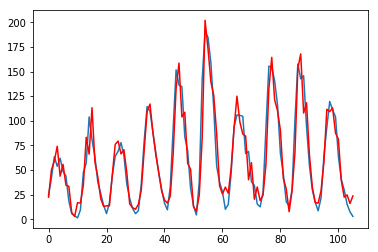

Test MSE: 261.129


In [24]:
test_extended = train.tolist()[-1*window_size:] + test
test_data = []
for i in test_extended:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)
test_data = np.array(test_data).reshape(-1,1)
test_scaled = min_max_scaler.fit_transform(test_data)
test_X,test_Y = [],[]
for i in range(0 , len(test_scaled) - window_size):
    test_X.append(test_scaled[i:i+window_size])
    test_Y.append(test_scaled[i+window_size])
    new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)
#new_test_X = np.reshape(new_test_X, (new_test_X.shape[0], new_test_X.shape[1], 1))
predictions = model.predict(new_test_X)
predictions_rescaled=min_max_scaler.inverse_transform(predictions)
Y = pd.DataFrame(test)
pred = pd.DataFrame(predictions_rescaled)
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()
error = mse(test,predictions_rescaled)
print('Test MSE: %.3f' % error)

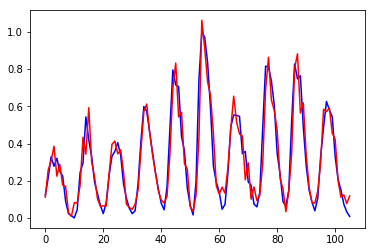

In [25]:
plt.plot(new_test_Y, 'b')
plt.plot(predictions, 'r')
plt.show()

In [26]:
error = mse(predictions,new_test_Y)
error

0.0073257439874040795

In [27]:
import pandas as pd
data=pd.read_csv("predictions_enn.csv",header=None)
predictions_enn=data.values.tolist()
import pandas as pd
data=pd.read_csv("predictions.csv",header=None)
predictions_ann=data.values.tolist()

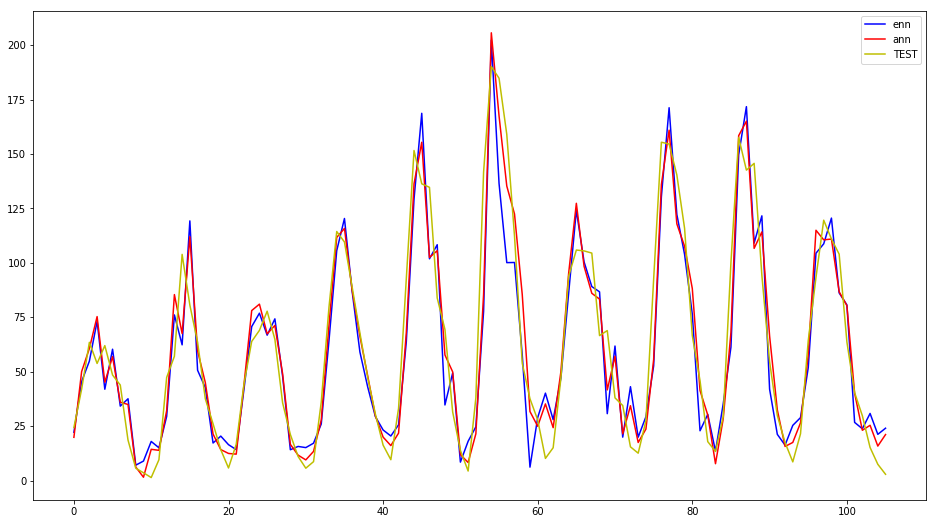

In [28]:
plt.figure(figsize=(16,9))
plt.plot(min_max_scaler.inverse_transform(predictions_enn), label = 'enn', color = 'b')
plt.plot(min_max_scaler.inverse_transform(predictions_ann), label = 'ann', color = 'r')
plt.plot(test, label = 'TEST', color = 'y')
plt.legend()
plt.show()

In [30]:
error = mse(test,min_max_scaler.inverse_transform(predictions_enn))
print('Test MSE ENN: %.3f' % error)
error = mse(test,min_max_scaler.inverse_transform(predictions_ann))
print('Test MSE ANN: %.3f' % error)

Test MSE ENN: 387.812
Test MSE ANN: 253.924


In [ ]:
np.sum((predictions-new_test_Y)**2)

In [ ]:
new_test_X.shape

In [ ]:
new_train_X.shape

In [ ]:
type(new_train_Y)

In [ ]:
np.savetxt('new_train_X.csv', new_train_X)
np.savetxt('new_train_Y.csv', new_train_Y)
np.savetxt('new_test_X.csv', new_test_X)
np.savetxt('predictions.csv', predictions)